In [1]:
import yaml
import sys
sys.path.append('../src')

from base_sindy import E_SINDy, BaseSINDy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/Users/terrycox/UofUCode/ProbML/probml_cs6190/project/src/base_sindy.py


In [219]:
with open("../configs/config.yaml", 'r') as stream:
    try:
        config=yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

In [220]:
config

{'mlflow': {'use_mlflow': False,
  'experiment_name': 'sindy_model',
  'run_name': 'sindy_base'},
 'data_path': '../data/teaTrial12.csv',
 'E_SINDy': {'n_models': 100,
  'point_ratio': 0.8,
  'optimizer': 'bayesian_ridge_regression',
  'random_seed': 42},
 'SINDy': {'poly_order': 5,
  'include_t': False,
  'include_poly_predictor': False,
  'order_predict': 0,
  'thresh': 0.0001,
  'alpha': 1,
  'k_spline': 3,
  'use_preprocessing': True,
  'interpolated_dt': 200},
 'derivative_method': 'one_pt',
 'stls_iterates': 5,
 'percent_thresh': 0.05,
 'smooth_coef': 0.7,
 'derivative_smooth_coef': 0.5,
 'bayesian_ridge_regression': {'lambda_': 2}}

In [221]:
if config['data_path'].endswith('massSpringData_blue_2_5.csv'):
    df = pd.read_csv(config['data_path'])[:100]
    m = df.to_numpy()
    t = m[:, 1]
    X = np.array([m[:, 3]])
elif 'tea' in config['data_path']:
    df = pd.read_csv(config['data_path'])
    df = df[df.time < 500]
    df = df[df.time > 7]
    df = df.iloc[list(range(0, len(df), 5))]
    m = df.to_numpy()
    t = m[:, 0]
    X = m[:, 1:].T
elif 'singleGreen200' in config['data_path']:
    df = pd.read_csv(config['data_path'])
    m = df.to_numpy()
    t = m[:, 0]
    X = m[:, 1:].T
else:
    
    t = np.linspace(0,25, 200)
    c0 = 1
    c1 = 1
    k = 0.25
    
    X = np.array([c0*np.cos(np.sqrt(k)*t)+c1*np.sin(np.sqrt(k)*t)])
    df = pd.DataFrame(np.array([t, X[0]]).T, columns=['t', 'x'])
t.shape, X.shape

((252,), (1, 252))

In [222]:
optimizer = config['E_SINDy']['optimizer']
sindy = BaseSINDy(config=config, **config['SINDy'], **config['mlflow'])

if optimizer == 'ridge':
    optimizer = sindy.ridge
    opti_vars = None
elif optimizer == 'lasso':
    optimizer = sindy.lasso
    opti_vars = None
elif optimizer == 'bayesian_ridge_regression':
    optimizer = sindy.bayesian_ridge_regression
    opti_vars = config['bayesian_ridge_regression']
else:
    optimizer = sindy.ridge
    opti_vars = None

coefs = sindy.fit(t, X, optimizer=optimizer, opti_vars=opti_vars, iterates=config['stls_iterates'])
print(sindy.coefs)

		 start spline...
		 spline done.
x_0
(10,)
Sigma [ 4.16157518 13.68395799 23.99322637 58.05531953 72.8352128  76.67615909
 67.58976127 79.72176916 80.28973759 80.3523493 ]
Mean coefs [-8.47631327e+00 -1.04369828e+01  7.73316543e+00  7.45527220e-01
 -1.66642442e+00  1.03972641e+00  1.10228956e+00  8.76071055e-02
 -7.04005494e-02  2.69146069e-03]
incorporating sigmas
coefs: [-8.476313273051645, 0, 0, 0, 0, 0, 0, 0, 0, 0]
precents: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 1.0
(1,)
Sigma [2.06068663]
Mean coefs [-5.47467106]
incorporating sigmas
coefs: [-5.474671058195479]
precents: [1.] 1.0
(1,)
Sigma [2.06068663]
Mean coefs [-5.47467106]
incorporating sigmas
coefs: [-5.474671058195479]
precents: [1.] 1.0
(1,)
Sigma [2.06068663]
Mean coefs [-5.47467106]
incorporating sigmas
coefs: [-5.474671058195479]
precents: [1.] 1.0
(1,)
Sigma [2.06068663]
Mean coefs [-5.47467106]
incorporating sigmas
coefs: [-5.474671058195479]
precents: [1.] 1.0
(1,)
Sigma [2.06068663]
Mean coefs [-5.47467106]
{'x_0': {'dx

/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generat

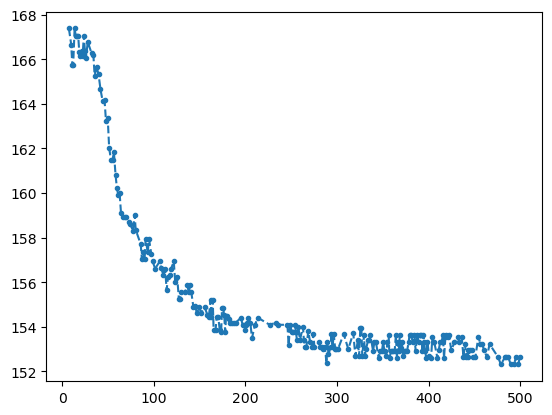

In [223]:
for x in X:
    plt.plot(t, x, '.--')
    # d1 = np.diff(x)/np.diff(t)
    # plt.plot(t[1:], d1, '.--')
    # plt.plot(t[2:], np.diff(d1)/np.diff(t[1:]), '.--')
#plt.title('Collected Mass Spring Data')
#plt.title('Tea Steeping Data (trial 12)')
# plt.title('Mass Spring Simulation (k=0.25)')
# plt.ylabel('position')
# plt.xlabel('time (s)')
# plt.savefig('./images/mass_spring_sim.png')
plt.show()

In [224]:
esindy = E_SINDy(config, **config['E_SINDy'], **config['mlflow'])

In [225]:
esindy.fit(t, X, **config['SINDy'], stls_iterates = config['stls_iterates'])

running iteration:  0
	 start sindy..
(201,) (1, 201)
		 start spline...
		 spline done.
x_0
(10,)
Sigma [ 3.68022679 14.50308893 21.82054915 45.77562343 54.94424512 58.02257723
 57.34319902 61.82701316 62.01410748 62.03143447]
Mean coefs [-6.95553957 -8.50846354  5.18406931 -1.57288161 -1.80355689  1.41918842
  4.75893478 -0.56970535  0.08595175 -0.01971481]
incorporating sigmas
coefs: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	 sindy end.
running iteration:  1
	 start sindy..
(201,) (1, 201)
		 start spline...
		 spline done.
x_0
(10,)
Sigma [ 3.5517711  16.64116697 20.49479398 48.57861983 56.20423419 58.11551077
 55.37641642 59.11655192 59.25219845 59.26377979]
Mean coefs [-7.56552199 -9.46168975  2.29305204 -1.53906353  0.48475617 -0.97474638
 -0.59281281 -0.33460775 -0.12092154 -0.01763325]
incorporating sigmas
coefs: [-7.565521986423037, 0, 0, 0, 0, 0, 0, 0, 0, 0]
precents: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 1.0
(1,)
Sigma [2.21243876]
Mean coefs [-5.64410909]
incorporating sigmas
coefs: [-5.6

/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generat

		 spline done.
x_0
(10,)
Sigma [ 4.21503062 16.14832692 20.13016753 42.72505051 54.95824489 58.44880316
 57.36421489 62.38679429 62.65495226 62.68199765]
Mean coefs [ -8.4046484  -10.28614166   2.78129454  -0.54779774  -0.37850281
  -0.38406034  -0.31291601  -0.48270483  -0.17784919  -0.04558143]
incorporating sigmas
coefs: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	 sindy end.
running iteration:  9
	 start sindy..
(201,) (1, 201)
		 start spline...
		 spline done.
x_0
(10,)
Sigma [ 3.70727135 13.6947194  23.69026975 49.90698976 58.73885371 61.97803873
 57.14502643 65.08910463 65.41451676 65.4519302 ]
Mean coefs [-7.9320374  -9.15356439  6.11685455  1.77019471 -0.89571662  0.61260722
 -1.11511867  0.19734961 -0.12603486  0.02993247]
incorporating sigmas
coefs: [-7.932037400517776, 0, 0, 0, 0, 0, 0, 0, 0, 0]
precents: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 1.0
(1,)
Sigma [2.16389118]
Mean coefs [-5.55561299]
incorporating sigmas
coefs: [-5.555612994286808]
precents: [1.] 1.0
(1,)
Sigma [2.16389118]
Mean

/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generat

x_0
(10,)
Sigma [  4.93429148  27.67943621  38.87788846 112.7447975  129.78852393
 132.65234629 125.71274658 133.69876114 133.83160064 133.83893792]
Mean coefs [-9.34674237e+00 -1.30707098e+01  9.70209254e+00 -3.46315141e+00
  2.15476060e-01 -3.54041974e-01 -1.10888957e-01 -3.46115103e-01
 -8.35267570e-03 -1.95243791e-02]
incorporating sigmas
coefs: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	 sindy end.
running iteration:  19
	 start sindy..
(201,) (1, 201)
		 start spline...
		 spline done.
x_0
(10,)
Sigma [ 3.47436515  9.7309385  13.31958162 27.85380146 34.88093148 36.97611801
 33.5688034  39.45691563 39.81740422 39.88137366]
Mean coefs [-6.96587322 -6.82537937  4.16333426  1.50524013 -2.09524828  0.43920987
  0.79096061  0.06278668 -0.06496424  0.01902104]
incorporating sigmas
coefs: [-6.96587322329077, 0, 0, 0, 0, 0, 0, 0, 0, 0]
precents: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 1.0
(1,)
Sigma [1.78789665]
Mean coefs [-4.55447574]
incorporating sigmas
coefs: [-4.554475742102935]
precents: [1.] 1.0
(1,

/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generat

		 spline done.
x_0
(10,)
Sigma [ 3.95841689 14.20579471 22.32702393 51.00992317 65.12701377 69.69237171
 64.65957359 74.90825405 75.9421861  76.12922002]
Mean coefs [-7.27056417 -8.93480353  8.01803764  1.03876319 -4.36357017  1.36105889
  4.77812944  1.24514408 -0.53139011  0.31070336]
incorporating sigmas
coefs: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	 sindy end.
running iteration:  32
	 start sindy..
(201,) (1, 201)
		 start spline...
		 spline done.
x_0
(10,)
Sigma [ 3.44017163 10.16366227 21.5007783  54.01433858 64.86999684 67.85366329
 55.9914947  69.9878442  70.59975795 70.68029404]
Mean coefs [-6.28665198 -8.04704041  9.75518136 -2.86425505  0.78935184 -0.72446508
  2.90736398  0.6671548   0.26029313  0.07962374]
incorporating sigmas
coefs: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	 sindy end.
running iteration:  33
	 start sindy..
(201,) (1, 201)
		 start spline...
		 spline done.
x_0
(10,)
Sigma [  4.18132519  16.7132267   30.54565533  96.46541908 122.76996246
 128.47375492 105.80939536 131.4

/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generat

(1,)
Sigma [2.02261744]
Mean coefs [-4.35191871]
	 sindy end.
running iteration:  43
	 start sindy..
(201,) (1, 201)
		 start spline...
		 spline done.
x_0
(10,)
Sigma [ 3.99060337 13.45535145 25.37394466 62.24230134 79.54832159 84.52772656
 74.77605312 90.68280943 91.35230631 91.42477324]
Mean coefs [-8.69355020e+00 -9.66930378e+00  6.67953381e+00  7.06277351e+00
 -3.43530800e+00  4.35168941e+00 -1.56800493e+00  1.95640667e-01
 -3.52238017e-01  6.07502060e-03]
incorporating sigmas
coefs: [-8.693550197874298, 0, 0, 0, 0, 0, 0, 0, 0, 0]
precents: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 1.0
(1,)
Sigma [1.89504367]
Mean coefs [-4.88006158]
incorporating sigmas
coefs: [-4.8800615751303456]
precents: [1.] 1.0
(1,)
Sigma [1.89504367]
Mean coefs [-4.88006158]
incorporating sigmas
coefs: [-4.8800615751303456]
precents: [1.] 1.0
(1,)
Sigma [1.89504367]
Mean coefs [-4.88006158]
incorporating sigmas
coefs: [-4.8800615751303456]
precents: [1.] 1.0
(1,)
Sigma [1.89504367]
Mean coefs [-4.88006158]
incorpora

/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generat

x_0
(10,)
Sigma [ 4.27659561 11.1922887  21.98525465 56.89401318 73.35430328 77.45388458
 56.53432235 79.33603243 81.52828245 81.93936327]
Mean coefs [-7.83604697 -9.70905749 10.51424996 -1.60700209  0.69411738 -0.72281411
 -1.80634317 -1.24357978 -1.0274928  -0.24834587]
incorporating sigmas
coefs: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	 sindy end.
running iteration:  55
	 start sindy..
(201,) (1, 201)
		 start spline...
		 spline done.
x_0
(10,)
Sigma [  5.23399665  22.55090332  52.82573244 260.77529904 415.90725849
 443.84335921 315.97964687 458.08438242 462.97762861 463.38937328]
Mean coefs [ -8.89586745 -13.38379843  17.59421089  16.63136062  -7.01431398
   6.81313024  27.7696519    4.25142014   1.77745376   0.44012049]
incorporating sigmas
coefs: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	 sindy end.
running iteration:  56
	 start sindy..
(201,) (1, 201)
		 start spline...
		 spline done.
x_0
(10,)
Sigma [  3.92108333  17.57679542  28.04664408  87.88785152 144.7784896
 161.10754398 150.18864874 17

/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generat

		 spline done.
x_0
(10,)
Sigma [ 3.71516304 11.24796906 18.21473785 40.83354332 49.12013912 51.63955705
 44.26675104 53.40518129 54.07981246 54.19359779]
Mean coefs [-7.70034186 -8.50464951  5.04276329  1.21311384 -0.08885609  0.21147831
  1.607873   -0.41400328 -0.20460693 -0.10039496]
incorporating sigmas
coefs: [-7.700341864802807, 0, 0, 0, 0, 0, 0, 0, 0, 0]
precents: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 1.0
(1,)
Sigma [1.97655711]
Mean coefs [-5.26035401]
incorporating sigmas
coefs: [-5.260354013556329]
precents: [1.] 1.0
(1,)
Sigma [1.97655711]
Mean coefs [-5.26035401]
incorporating sigmas
coefs: [-5.260354013556329]
precents: [1.] 1.0
(1,)
Sigma [1.97655711]
Mean coefs [-5.26035401]
incorporating sigmas
coefs: [-5.260354013556329]
precents: [1.] 1.0
(1,)
Sigma [1.97655711]
Mean coefs [-5.26035401]
incorporating sigmas
coefs: [-5.260354013556329]
precents: [1.] 1.0
(1,)
Sigma [1.97655711]
Mean coefs [-5.26035401]
	 sindy end.
running iteration:  67
	 start sindy..
(201,) (1, 201)
		 s

/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generat

x_0
(10,)
Sigma [ 3.63533487 11.36309662 18.39473075 47.21827563 61.16488244 64.45591244
 55.84124359 67.06860875 67.66134343 67.73396496]
Mean coefs [-8.13757285 -8.74143903  5.72000494  3.50929579 -2.71927816  2.01839794
  3.66462583 -0.45212869  0.31990515 -0.02029176]
incorporating sigmas
coefs: [-8.137572851709413, 0, 0, 0, 0, 0, 0, 0, 0, 0]
precents: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 1.0
(1,)
Sigma [1.76755329]
Mean coefs [-4.76733714]
incorporating sigmas
coefs: [-4.76733714473034]
precents: [1.] 1.0
(1,)
Sigma [1.76755329]
Mean coefs [-4.76733714]
incorporating sigmas
coefs: [-4.76733714473034]
precents: [1.] 1.0
(1,)
Sigma [1.76755329]
Mean coefs [-4.76733714]
incorporating sigmas
coefs: [-4.76733714473034]
precents: [1.] 1.0
(1,)
Sigma [1.76755329]
Mean coefs [-4.76733714]
incorporating sigmas
coefs: [-4.76733714473034]
precents: [1.] 1.0
(1,)
Sigma [1.76755329]
Mean coefs [-4.76733714]
	 sindy end.
running iteration:  77
	 start sindy..
(201,) (1, 201)
		 start spline...
		 sp

/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generat

x_0
(10,)
Sigma [  5.55051785  26.29758112  73.42598422 345.31002296 662.68641256
 746.2885844  505.58771042 806.96254925 818.77111111 819.54117782]
Mean coefs [ -8.75056127 -12.49366946  14.69712797  13.06073321  -0.37907865
   5.01073452  52.17985836   2.41993909   3.5173362    0.29933255]
incorporating sigmas
coefs: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	 sindy end.
running iteration:  89
	 start sindy..
(201,) (1, 201)
		 start spline...
		 spline done.
x_0
(10,)
Sigma [  3.8178646   13.98539693  21.4618878   48.17864469  61.38130573
  69.2580257   82.73597734 102.55321155 106.29223479 108.41602979]
Mean coefs [ -8.16149236 -12.86926059   6.80610393   7.56880979  11.8093888
  -0.31748104   3.04017588   0.54501617   1.51961093   1.01421952]
incorporating sigmas
coefs: [-8.161492360382084, 0, 0, 0, 0, 0, 0, 0, 0, 0]
precents: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 1.0
(1,)
Sigma [1.66903565]
Mean coefs [-4.56258438]
incorporating sigmas
coefs: [-4.562584375962439]
precents: [1.] 1.0
(1,)
Sigma [1.

/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generat

{'x_0': {'mean': {'dx_0': -2.205436582191887,
   'dxx_0': 0.0,
   'dx_0^2': 0.0,
   'dx_0^3': 0.0,
   'dx_0^4': 0.0,
   'dx_0^5': 0.0,
   'dxx_0^2': 0.0,
   'dxx_0^3': 0.0,
   'dxx_0^4': 0.0,
   'dxx_0^5': 0.0},
  'std': {'dx_0': 2.6021185168691163,
   'dxx_0': 0.0,
   'dx_0^2': 0.0,
   'dx_0^3': 0.0,
   'dx_0^4': 0.0,
   'dx_0^5': 0.0,
   'dxx_0^2': 0.0,
   'dxx_0^3': 0.0,
   'dxx_0^4': 0.0,
   'dxx_0^5': 0.0},
  'df':         dx_0  dxx_0  dx_0^2  dx_0^3  dx_0^4  dx_0^5  dxx_0^2  dxx_0^3  \
  0   0.000000      0       0       0       0       0        0        0   
  1  -5.644109      0       0       0       0       0        0        0   
  2   0.000000      0       0       0       0       0        0        0   
  3   0.000000      0       0       0       0       0        0        0   
  4  -5.450392      0       0       0       0       0        0        0   
  ..       ...    ...     ...     ...     ...     ...      ...      ...   
  95  0.000000      0       0       0       0       0

In [226]:
headers = [f'${c}$' for c in esindy.coefs['x_0']['mean'].keys()]
data = {row : np.round(list(esindy.coefs['x_0'][row].values()), 2) for row in ['mean', 'std']}

def latex_table(headers, data):
   textabular = f"l|{'r'*len(headers)}"
   texheader = " & " + " & ".join(headers) + "\\\\"
   texdata = "\\hline\n"
   for label in sorted(data):
      if label == "z":
         texdata += "\\hline\n"
      texdata += f"{label} & {' & '.join(map(str,data[label]))} \\\\\n"

   print("\\begin{tabular}{"+textabular+"}")
   print(texheader)
   print(texdata,end="")
   print("\\end{tabular}")

latex_table(headers, data)

\begin{tabular}{l|rrrrrrrrrr}
 & $dx_0$ & $dxx_0$ & $dx_0^2$ & $dx_0^3$ & $dx_0^4$ & $dx_0^5$ & $dxx_0^2$ & $dxx_0^3$ & $dxx_0^4$ & $dxx_0^5$\\
\hline
mean & -2.21 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
std & 2.6 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
\end{tabular}


In [227]:
a = np.array(list(esindy.coefs['x_0']['mean'].values()))
np.abs(a)/np.sum(np.abs(a))

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

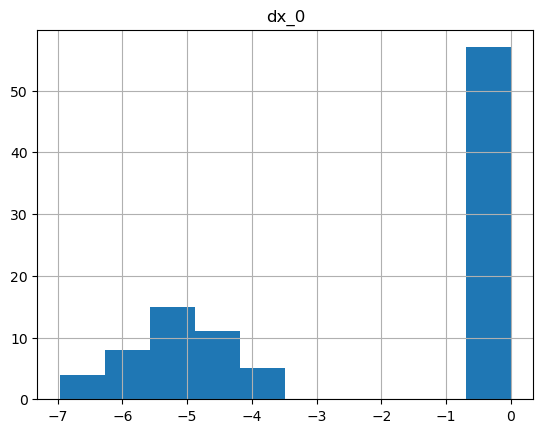

In [228]:
df_coefs = esindy.coefs['x_0']['df']
df_coefs[[a for a in df_coefs.columns if np.sum(np.abs(df_coefs[a])) > 0.0001]].hist() #figsize=(10,20)
plt.show()

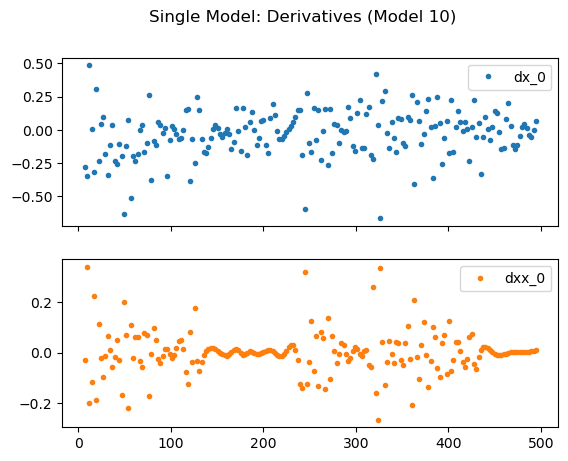

In [237]:
esindy.all_dfs[10][[k for k, v in esindy.coefs['x_0']['mean'].items() if '^' not in k]].plot(subplots=True, style='.')
plt.suptitle('Single Model: Derivatives (Model 10)')
plt.savefig('./images/bayes_tea_derv.png')
plt.show()

In [194]:
esindy.all_dfs[0]

,dx_0,dxx_0,dx_0^2,dx_0^3,dx_0^4,dx_0^5,dxx_0^2,dxx_0^3,dxx_0^4,dxx_0^5
9.764000,-0.245542,0.275294,0.060291,-1.480391e-02,3.634979e-03,-8.925394e-04,7.578663e-02,2.086358e-02,5.743613e-03,1.581181e-03
12.224513,0.423325,-0.196685,0.179204,7.586134e-02,3.211397e-02,1.359463e-02,3.868507e-02,-7.608782e-03,1.496535e-03,-2.943463e-04
14.685025,-0.013879,-0.155434,0.000193,-2.673606e-06,3.710762e-08,-5.150257e-10,2.415981e-02,-3.755263e-03,5.836966e-04,-9.072645e-05
17.145538,-0.503328,0.195607,0.253339,-1.275124e-01,6.418050e-02,-3.230382e-02,3.826192e-02,7.484283e-03,1.463975e-03,2.863631e-04
19.606050,0.095471,0.041694,0.009115,8.701929e-04,8.307826e-05,7.931571e-06,1.738427e-03,7.248277e-05,3.022130e-06,1.260060e-07
...,...,...,...,...,...,...,...,...,...,...
484.642925,0.023545,-0.000985,0.000554,1.305287e-05,3.073321e-07,7.236188e-09,9.711969e-07,-9.571080e-10,9.432234e-13,-9.295403e-16
487.103437,-0.020889,0.005739,0.000436,-9.115047e-06,1.904051e-07,-3.977390e-09,3.293340e-05,1.889969e-07,1.084609e-09,6.224311e-12
489.563950,-0.061010,0.015709,0.003722,-2.270952e-04,1.385513e-05,-8.453050e-07,2.467611e-04,3.876279e-06,6.089105e-08,9.565150e-10
492.024462,-0.064423,0.029426,0.004150,-2.673708e-04,1.722472e-05,-1.109660e-06,8.659088e-04,2.548052e-05,7.497981e-07,2.206381e-08


In [229]:
n_models = config['E_SINDy']['n_models']
data = {'Ridge' : []}
for col in esindy.coefs['x_0']['df'].columns:
    non_zero = [v for v in esindy.coefs['x_0']['df'][col] if np.abs(v) > esindy.thresh]
    data['Ridge'].append(f'{len(non_zero)}')
    print(f'{col} (count non-zeros: {len(non_zero)}/{n_models})')
latex_table(headers=headers, data=data)

dx_0 (count non-zeros: 43/100)
dxx_0 (count non-zeros: 0/100)
dx_0^2 (count non-zeros: 0/100)
dx_0^3 (count non-zeros: 0/100)
dx_0^4 (count non-zeros: 0/100)
dx_0^5 (count non-zeros: 0/100)
dxx_0^2 (count non-zeros: 0/100)
dxx_0^3 (count non-zeros: 0/100)
dxx_0^4 (count non-zeros: 0/100)
dxx_0^5 (count non-zeros: 0/100)
\begin{tabular}{l|rrrrrrrrrr}
 & $dx_0$ & $dxx_0$ & $dx_0^2$ & $dx_0^3$ & $dx_0^4$ & $dx_0^5$ & $dxx_0^2$ & $dxx_0^3$ & $dxx_0^4$ & $dxx_0^5$\\
\hline
Ridge & 43 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{tabular}


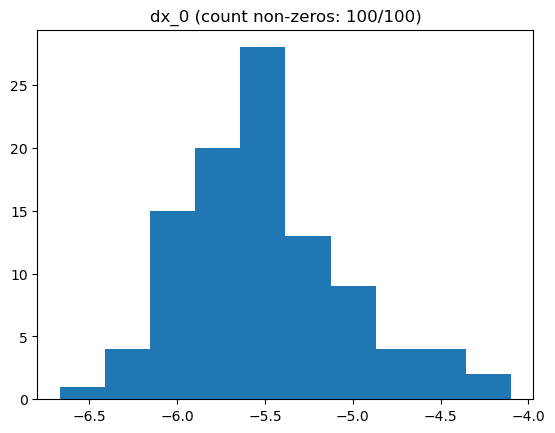

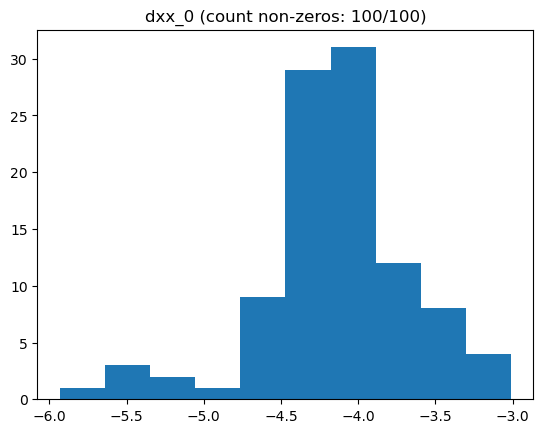

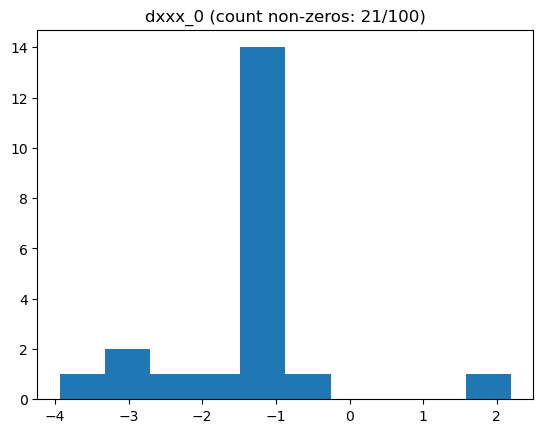

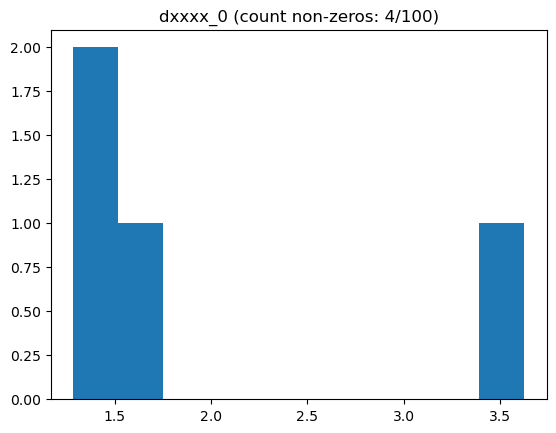

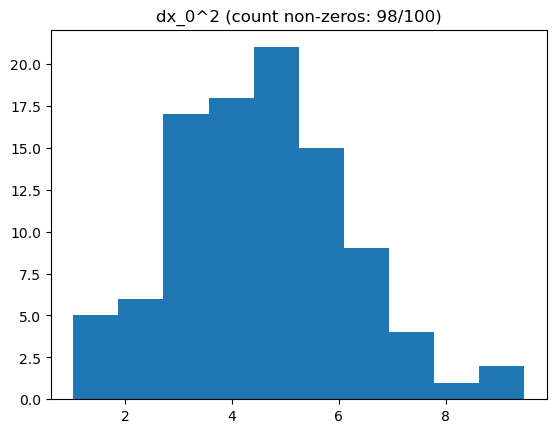

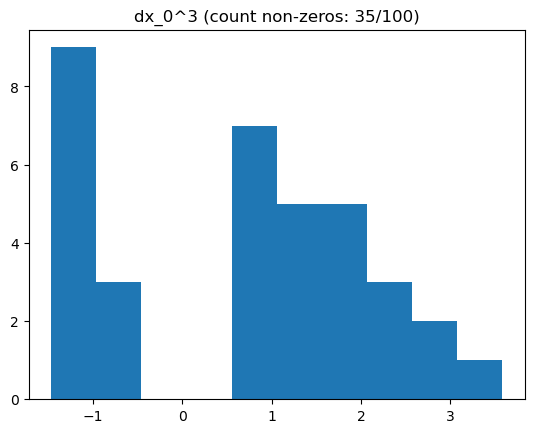

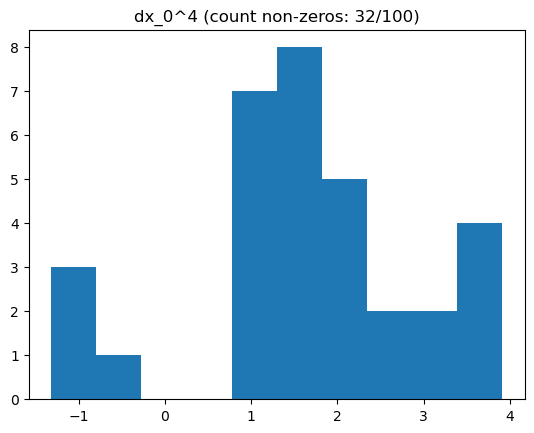

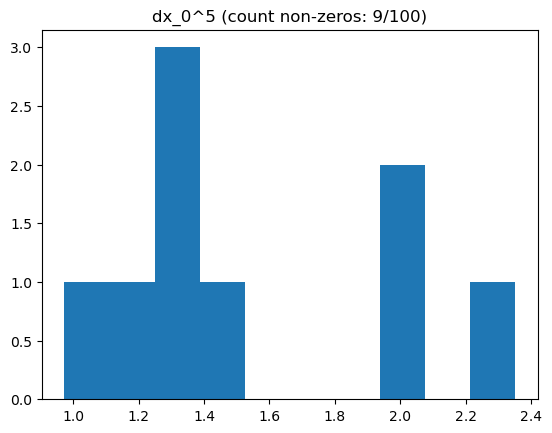

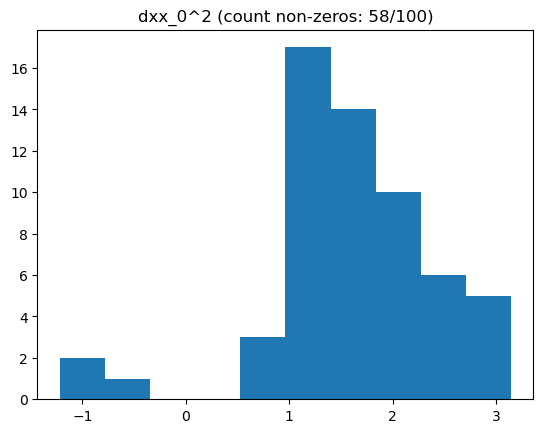

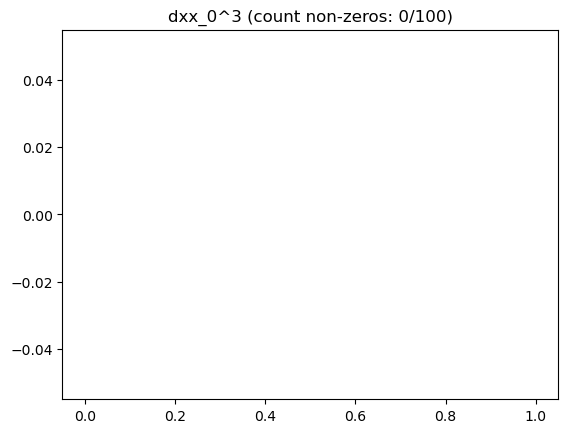

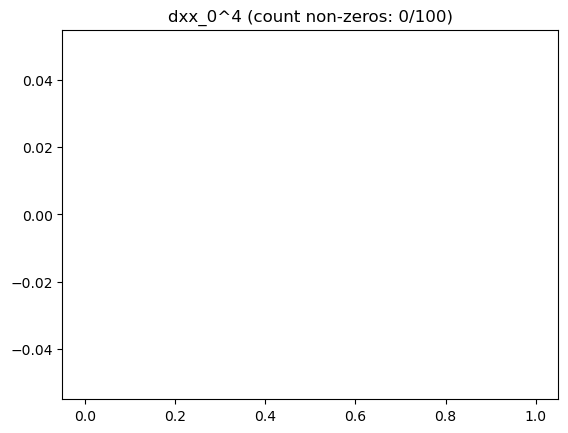

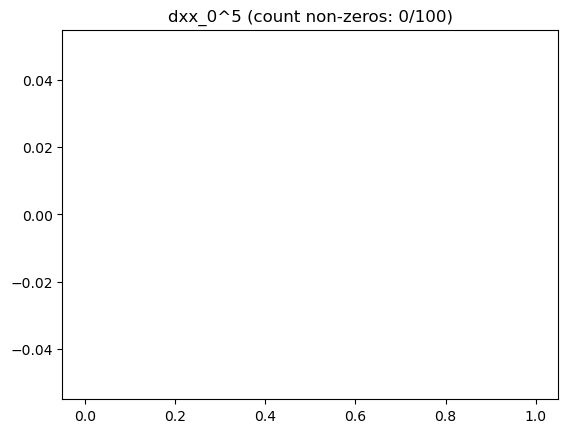

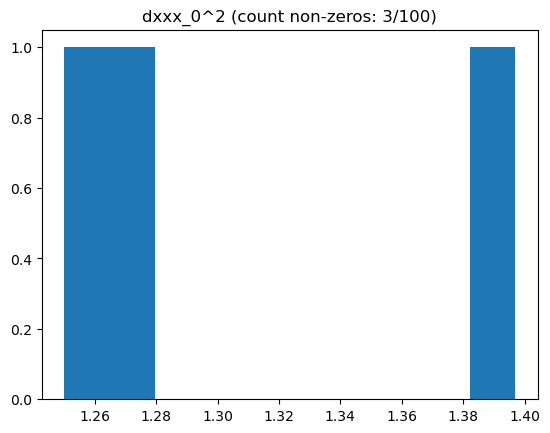

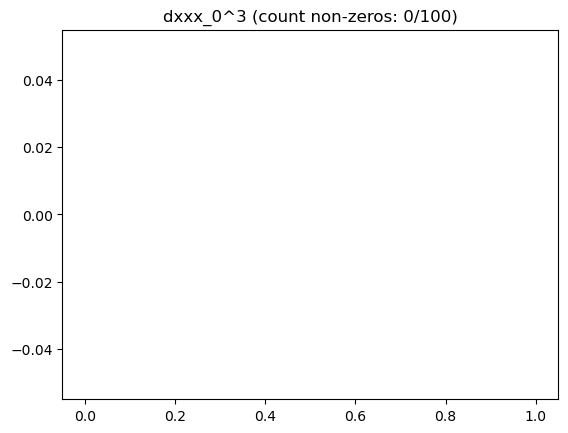

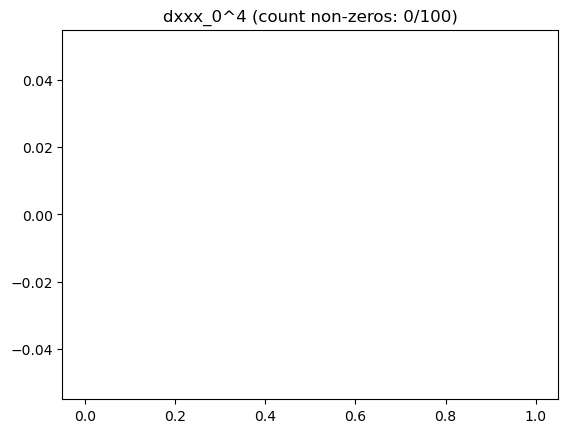

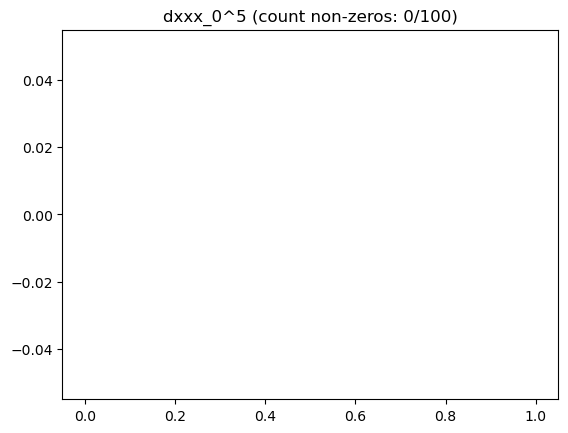

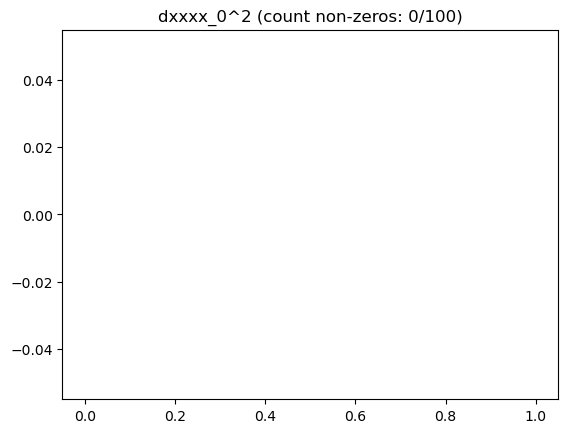

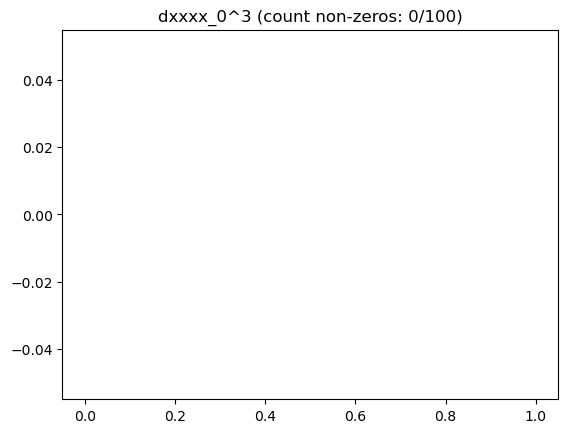

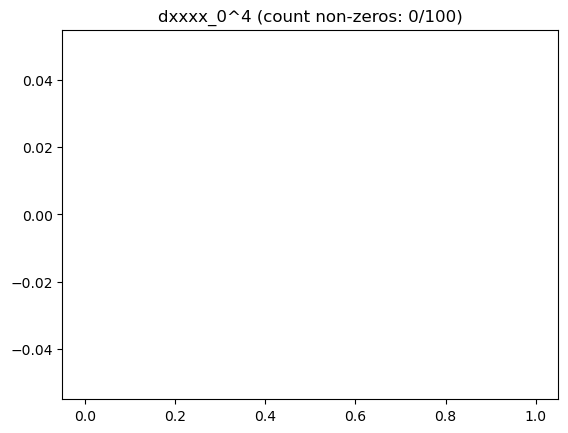

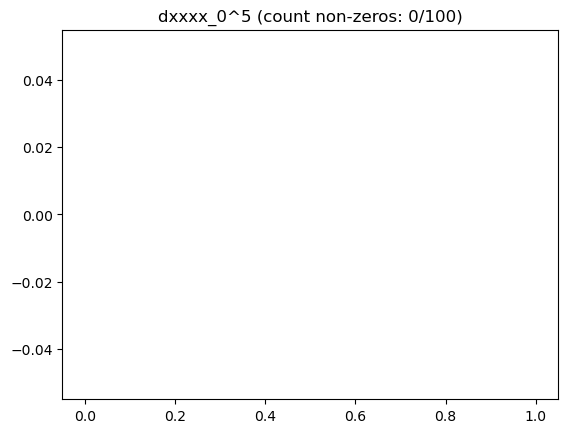

In [81]:
n_models = config['E_SINDy']['n_models']
for col in esindy.coefs['x_0']['df'].columns:
    non_zero = [v for v in esindy.coefs['x_0']['df'][col] if np.abs(v) > esindy.thresh]
    plt.hist(non_zero)
    plt.title(f'{col} (count non-zeros: {len(non_zero)}/{n_models})')
    plt.show()

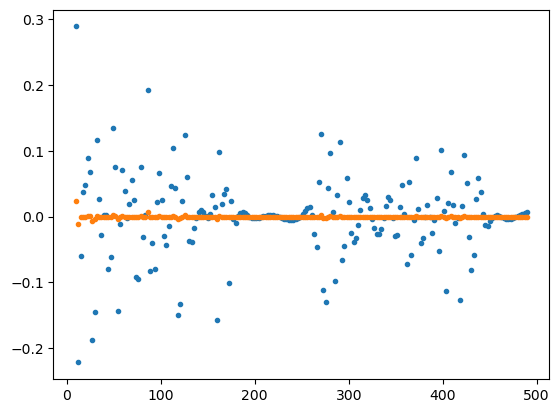

In [79]:
plt.plot(esindy.all_dfs[0].index, esindy.all_dfs[0].dxx_0, '.')
plt.plot(esindy.all_dfs[0].index, esindy.all_dfs[0]['dxx_0^3'], '.')
plt.show()